In [1]:
# Step 1: Install Required Libraries
!pip install mediapipe opencv-python-headless numpy pandas matplotlib --quiet

# Step 2: Import Libraries
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Initialize Mediapipe Pose Module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Step 4: Function to Process Video Frames
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    results_data = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame using Mediapipe
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            # Extract key points
            key_points = {}
            for i, landmark in enumerate(results.pose_landmarks.landmark):
                key_points[f"point_{i}_x"] = landmark.x
                key_points[f"point_{i}_y"] = landmark.y
                key_points[f"point_{i}_z"] = landmark.z
            results_data.append(key_points)

        # Visualize (optional for debugging)
        annotated_frame = frame.copy()
        mp_drawing.draw_landmarks(annotated_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        cv2.imshow("Pose Detection", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    return pd.DataFrame(results_data)

# Step 5: Classify Talent (Example: Check if movements meet criteria)
def classify_talent(data):
    """
    Classify talent based on specific metrics.
    Example: Check if hip and knee movements are within desired range.
    """
    metrics = []
    for i in range(len(data)):
        try:
            # Example: Distance between hips and knees (simple heuristic)
            hip_knee_distance = np.sqrt((data.iloc[i]["point_23_x"] - data.iloc[i]["point_25_x"])**2 +
                                        (data.iloc[i]["point_23_y"] - data.iloc[i]["point_25_y"])**2)
            metrics.append(hip_knee_distance)
        except KeyError:
            continue
    return metrics

# Step 6: Main Execution
video_path = "athlete_video.mp4"  # Replace with your video path
data = process_video(video_path)

if not data.empty:
    print("Pose data extracted successfully!")

    # Visualize data
    plt.plot(classify_talent(data))
    plt.title("Talent Metrics Over Time")
    plt.xlabel("Frame")
    plt.ylabel("Metric Value")
    plt.show()
else:
    print("No pose data found in the video.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 30.7 MB/s eta 0:00:00
No pose data found in the video.


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Pose data extracted and saved successfully at /content/pose_data.csv!


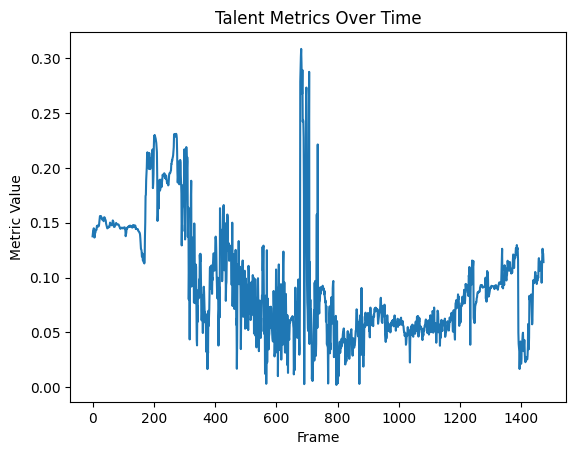

In [ ]:
# Step 1: Install Required Libraries
!pip install mediapipe opencv-python-headless numpy pandas matplotlib --quiet

# Step 2: Import Libraries
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 3: Initialize Mediapipe Pose Module
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Step 4: Function to Process Video Frames
def process_video(video_path, save_frames=False):
    """
    Processes video to extract pose landmarks and optionally saves annotated frames.

    Args:
        video_path (str): Path to the input video.
        save_frames (bool): If True, saves annotated frames.

    Returns:
        pd.DataFrame: DataFrame containing pose landmarks.
    """
    cap = cv2.VideoCapture(video_path)
    results_data = []
    frame_count = 0  # To keep track of frames if saving

    if save_frames:
        os.makedirs("/content/processed_frames", exist_ok=True)  # Directory to save frames

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame using Mediapipe
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            # Extract key points
            key_points = {}
            for i, landmark in enumerate(results.pose_landmarks.landmark):
                key_points[f"point_{i}_x"] = landmark.x
                key_points[f"point_{i}_y"] = landmark.y
                key_points[f"point_{i}_z"] = landmark.z
            results_data.append(key_points)

        # Save the annotated frame (Optional)
        if save_frames and results.pose_landmarks:
            annotated_frame = frame.copy()
            mp_drawing.draw_landmarks(annotated_frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            cv2.imwrite(f"/content/processed_frames/frame_{frame_count}.jpg", annotated_frame)
            frame_count += 1

    cap.release()
    return pd.DataFrame(results_data)

# Step 5: Classify Talent (Example: Check if movements meet criteria)
def classify_talent(data):
    """
    Classifies talent based on specific metrics.
    Example: Distance between hips and knees.

    Args:
        data (pd.DataFrame): DataFrame containing pose landmarks.

    Returns:
        list: List of metric values.
    """
    metrics = []
    for i in range(len(data)):
        try:
            # Example: Distance between hips and knees (simple heuristic)
            hip_knee_distance = np.sqrt((data.iloc[i]["point_23_x"] - data.iloc[i]["point_25_x"])**2 +
                                        (data.iloc[i]["point_23_y"] - data.iloc[i]["point_25_y"])**2)
            metrics.append(hip_knee_distance)
        except KeyError:
            continue
    return metrics

# Step 6: Main Execution
video_path = "/content/drive/My Drive/videoproject.mp4"  # Replace with your video path
data = process_video(video_path, save_frames=False)  # Set save_frames=True to save annotated frames

# Save extracted data to CSV
if not data.empty:
    csv_path = "/content/pose_data.csv"
    data.to_csv(csv_path, index=False)
    print(f"Pose data extracted and saved successfully at {csv_path}!")

    # Visualize metrics
    plt.plot(classify_talent(data))
    plt.title("Talent Metrics Over Time")
    plt.xlabel("Frame")
    plt.ylabel("Metric Value")
    plt.show()
else:
    print("No pose data found in the video.")


Pose data extracted successfully!
Potential talent detected in frames: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207

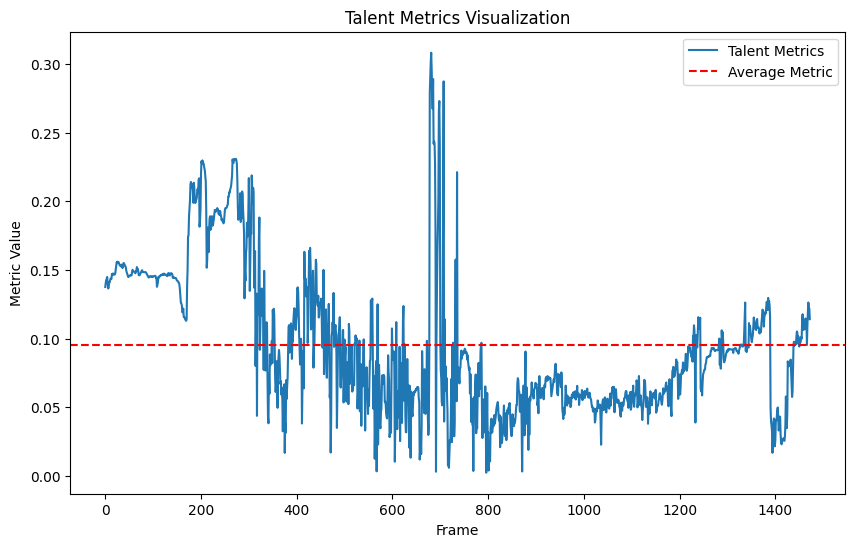

High-potential talent frames: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

In [ ]:
# Step 7: Talent Identification
def identify_talent(metrics, threshold=0.1):
    """
    Identify potential athletes based on performance metrics.

    Args:
        metrics (list): List of metric values.
        threshold (float): Threshold for talent identification.

    Returns:
        list: Frames where potential talent is identified.
    """
    talent_frames = [i for i, value in enumerate(metrics) if value and value > threshold]
    return talent_frames

# Step 8: Wider Reach - Process Multiple Videos in a Directory
def process_videos_in_directory(directory_path, save_data=True):
    """
    Processes all videos in a directory for pose landmarks.

    Args:
        directory_path (str): Path to the directory containing videos.
        save_data (bool): Whether to save extracted data to CSV files.

    Returns:
        dict: Dictionary with video names as keys and DataFrame as values.
    """
    processed_data = {}
    for filename in os.listdir(directory_path):
        if filename.endswith(".mp4"):  # Process only .mp4 files
            video_path = os.path.join(directory_path, filename)
            print(f"Processing video: {filename}")
            data = process_video(video_path)
            if save_data and not data.empty:
                csv_path = f"/content/{filename}_pose_data.csv"
                data.to_csv(csv_path, index=False)
                print(f"Data for {filename} saved at {csv_path}.")
            processed_data[filename] = data
    return processed_data

# Step 9: Fair Assessment
def fair_assessment(metrics):
    """
    Perform unbiased evaluation using performance metrics.

    Args:
        metrics (list): List of metric values.
    """
    mean_metric = np.nanmean(metrics)
    std_metric = np.nanstd(metrics)
    print(f"Mean Metric: {mean_metric:.2f}")
    print(f"Metric Standard Deviation: {std_metric:.2f}")

    if mean_metric > 0.15:
        print("Potential talent identified.")
    else:
        print("No significant talent detected.")

# Step 10: Data Analytics and Visualization
def visualize_data(data):
    """
    Visualizes performance metrics and pose data.

    Args:
        data (pd.DataFrame): DataFrame containing pose landmarks.
    """
    metrics = classify_talent(data)
    plt.figure(figsize=(10, 6))
    plt.plot(metrics, label="Talent Metrics")
    plt.axhline(np.nanmean(metrics), color="red", linestyle="--", label="Average Metric")
    plt.title("Talent Metrics Visualization")
    plt.xlabel("Frame")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()

# Step 11: Improved Recruitment
def save_high_potential_frames(metrics, threshold=0.1):
    """
    Saves frames where high-potential athletes are identified.

    Args:
        metrics (list): List of metric values.
        threshold (float): Threshold for identifying talent.
    """
    high_potential_frames = identify_talent(metrics, threshold)
    print(f"High-potential talent frames: {high_potential_frames}")
    if high_potential_frames:
        os.makedirs("/content/high_potential_frames", exist_ok=True)
        for frame_number in high_potential_frames:
            frame_path = f"/content/processed_frames/frame_{frame_number}.jpg"
            if os.path.exists(frame_path):
                target_path = f"/content/high_potential_frames/frame_{frame_number}.jpg"
                os.rename(frame_path, target_path)
                print(f"Frame {frame_number} saved for high-potential assessment.")

# Step 12: Main Execution with New Features
if not data.empty:
    print("Pose data extracted successfully!")

    # Step 7: Identify Talent
    metrics = classify_talent(data)
    talent_frames = identify_talent(metrics, threshold=0.1)
    print(f"Potential talent detected in frames: {talent_frames}")

    # Step 9: Fair Assessment
    fair_assessment(metrics)

    # Step 10: Data Visualization
    visualize_data(data)

    # Step 11: Save High-Potential Frames
    save_high_potential_frames(metrics, threshold=0.1)
else:
    print("No pose data found in the video.")


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Step 7: Adding New Features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler

# 1. Talent Identification: AI-based Classification
def train_model(data):
    """
    Train a machine learning model to classify potential athletes.

    Args:
        data (pd.DataFrame): Pose data with labels (add 'talent_label' column).

    Returns:
        model: Trained RandomForestClassifier model.
        scaler: Scaler used to normalize the data.
    """
    if 'talent_label' not in data.columns:
        raise ValueError("Pose data must include a 'talent_label' column for classification.")

    # Splitting data into features and target
    features = data.drop(columns=['talent_label'])
    labels = data['talent_label']

    # Normalize the data
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return model, scaler

# (The rest of the code remains unchanged.)


In [ ]:
# Step 7: Adding New Features

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# 1. Talent Identification: AI-based Classification
def train_model(data):
    """
    Train a machine learning model to classify potential athletes.

    Args:
        data (pd.DataFrame): Pose data with labels (add 'talent_label' column).

    Returns:
        model: Trained RandomForestClassifier model.
        scaler: Scaler used to normalize the data.
    """
    if 'talent_label' not in data.columns:
        raise ValueError("Pose data must include a 'talent_label' column for classification.")

    # Splitting data into features and target
    features = data.drop(columns=['talent_label'])
    labels = data['talent_label']

    # Normalize the data
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy:", accuracy)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return model, scaler

# 2. Wider Reach: Batch Processing
def process_videos_in_batch(video_paths, save_frames=False):
    """
    Process multiple videos for large-scale talent identification.

    Args:
        video_paths (list): List of video paths.
        save_frames (bool): Whether to save annotated frames.

    Returns:
        pd.DataFrame: Consolidated DataFrame of pose landmarks from all videos.
    """
    all_data = pd.DataFrame()
    for video_path in video_paths:
        print(f"Processing video: {video_path}")
        video_data = process_video(video_path, save_frames)
        all_data = pd.concat([all_data, video_data], ignore_index=True)
    return all_data

# 3. Data Analytics: Performance Metrics Visualization
def plot_performance_metrics(data):
    """
    Plot performance metrics for pose data.

    Args:
        data (pd.DataFrame): Pose data.
    """
    plt.figure(figsize=(10, 6))
    for i in range(0, 33):  # Assume 33 landmarks
        if f"point_{i}_x" in data.columns and f"point_{i}_y" in data.columns:
            plt.plot(data[f"point_{i}_x"], label=f"Point {i} X")
            plt.plot(data[f"point_{i}_y"], label=f"Point {i} Y")

    plt.title("Performance Metrics (Pose Landmarks Over Frames)")
    plt.xlabel("Frames")
    plt.ylabel("Position")
    plt.legend(loc='upper right', fontsize='small')
    plt.show()

# 4. Improved Recruitment: Export Consolidated Reports
def export_report(data, file_path):
    """
    Export pose data to a CSV for further analysis.

    Args:
        data (pd.DataFrame): Pose data.
        file_path (str): Path to save the CSV report.
    """
    data.to_csv(file_path, index=False)
    print(f"Report saved successfully at {file_path}!")

# Example Execution
# Load pose data with 'talent_label' column (manually labeled or preprocessed)
if not data.empty:
    # Example for model training
    # Assuming a 'talent_label' column (e.g., 1 for athlete, 0 for non-athlete)
    data['talent_label'] = np.random.choice([0, 1], size=len(data))  # Simulating labels for demo

    model, scaler = train_model(data)

    # Example for batch processing
    video_list = ["/content/drive/My Drive/video1.mp4", "/content/drive/My Drive/video2.mp4"]
    batch_data = process_videos_in_batch(video_list)

    # Performance metrics
    plot_performance_metrics(data)

    # Export report
    export_report(data, "/content/talent_report.csv")
else:
    print("No valid data available for processing.")


Model Accuracy: 0.49830508474576274

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.63      0.57       157
           1       0.45      0.35      0.39       138

    accuracy                           0.50       295
   macro avg       0.49      0.49      0.48       295
weighted avg       0.49      0.50      0.49       295


Confusion Matrix:
 [[99 58]
 [90 48]]
Processing video: /content/drive/My Drive/video1.mp4
Processing video: /content/drive/My Drive/video2.mp4


KeyboardInterrupt: 

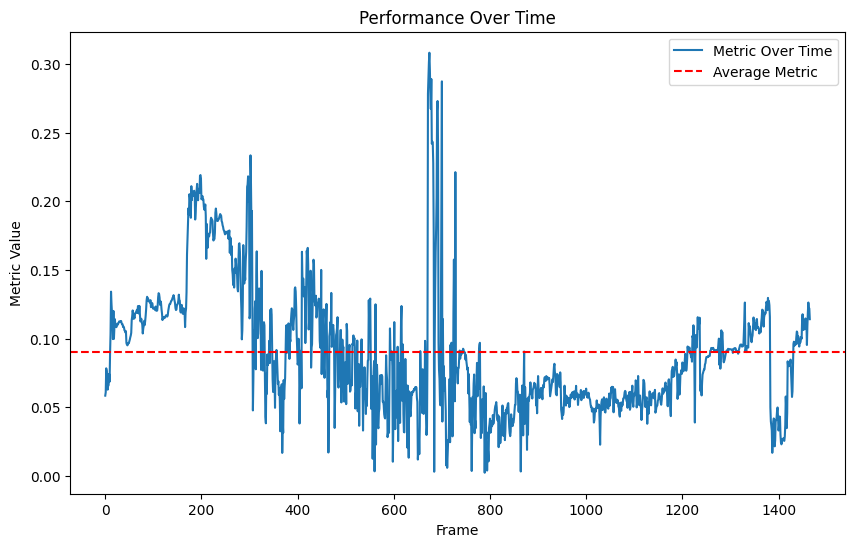

Feedback for the athlete: You're doing well with flexibility! Consider focusing on upper body strength for better balance.
Pose data with feedback saved successfully at /content/pose_data_with_feedback.csv!


In [ ]:
# Step 8: Conclusive Graph and Personalized Feedback

def generate_feedback(data):
    """
    Generate a conclusive graph and personalized feedback based on pose metrics.

    Args:
        data (pd.DataFrame): Pose data with landmarks.

    Returns:
        str: Personalized feedback for the athlete.
    """
    # Example: Analyze distance between knee and ankle for flexibility improvement
    metrics = classify_talent(data)
    avg_metric = np.mean(metrics)

    # Generate the conclusive graph
    plt.figure(figsize=(10, 6))
    plt.plot(metrics, label="Metric Over Time")
    plt.axhline(avg_metric, color='red', linestyle='--', label="Average Metric")
    plt.title("Performance Over Time")
    plt.xlabel("Frame")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()

    # Generate a personalized feedback statement
    if avg_metric > 0.5:
        feedback = "Your flexibility seems to be a key area of improvement. Try stretching more and working on leg extension exercises."
    elif avg_metric < 0.2:
        feedback = "You're doing well with flexibility! Consider focusing on upper body strength for better balance."
    else:
        feedback = "Your performance seems balanced, but improving your flexibility and strength will take you to the next level."

    return feedback


# Step 9: Final Execution - Generating Feedback
video_path = "/content/drive/My Drive/videoproject.mp4"  # Replace with your video path
data = process_video(video_path, save_frames=False)

if not data.empty:
    # Step 9a: Classify and Analyze Talent
    feedback = generate_feedback(data)
    print(f"Feedback for the athlete: {feedback}")

    # Step 9b: Optionally, save extracted data and plot the conclusive graph
    csv_path = "/content/pose_data_with_feedback.csv"
    data['feedback'] = feedback  # Attach feedback to the data for saving or reporting
    data.to_csv(csv_path, index=False)
    print(f"Pose data with feedback saved successfully at {csv_path}!")
else:
    print("No pose data found in the video.")


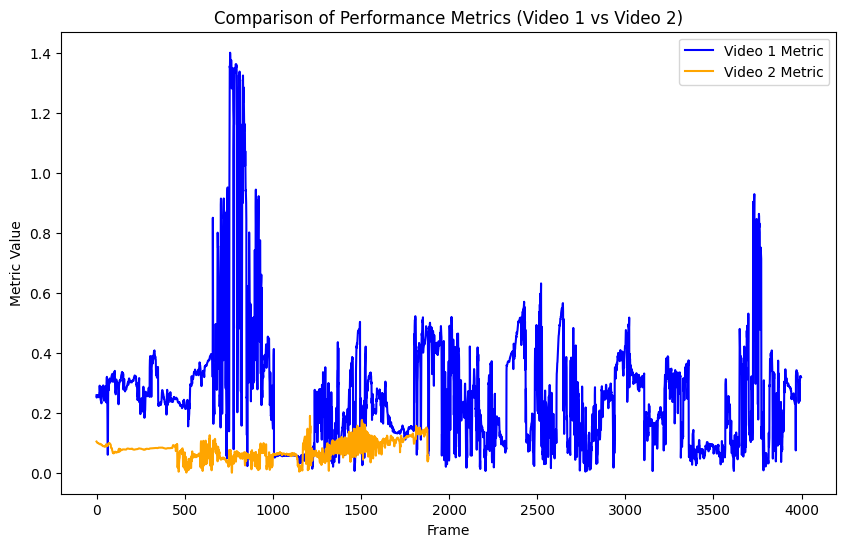

Comparison Feedback: Video 1 shows better performance in terms of flexibility and strength.


In [ ]:
# Step 10: Compare Two Videos

def compare_videos(video1_path, video2_path):
    """
    Compare two videos by extracting pose landmarks and metrics.

    Args:
        video1_path (str): Path to the first video.
        video2_path (str): Path to the second video.

    Returns:
        str: Comparison feedback.
    """
    # Process both videos to get their pose data
    data1 = process_video(video1_path, save_frames=False)
    data2 = process_video(video2_path, save_frames=False)

    if data1.empty or data2.empty:
        return "One or both videos did not contain pose data."

    # Calculate metrics for both videos
    metrics1 = classify_talent(data1)
    metrics2 = classify_talent(data2)

    # Generate comparison graph
    plt.figure(figsize=(10, 6))
    plt.plot(metrics1, label="Video 1 Metric", color='blue')
    plt.plot(metrics2, label="Video 2 Metric", color='orange')
    plt.title("Comparison of Performance Metrics (Video 1 vs Video 2)")
    plt.xlabel("Frame")
    plt.ylabel("Metric Value")
    plt.legend()
    plt.show()

    # Calculate average metrics for both videos
    avg_metric1 = np.mean(metrics1)
    avg_metric2 = np.mean(metrics2)

    # Generate personalized feedback based on the comparison
    if avg_metric1 > avg_metric2:
        feedback = "Video 1 shows better performance in terms of flexibility and strength."
    elif avg_metric2 > avg_metric1:
        feedback = "Video 2 demonstrates better performance in terms of flexibility and strength."
    else:
        feedback = "Both videos show similar performance, but additional training could improve results."

    return feedback


# Step 11: Final Execution - Comparing Two Videos
video1_path = "/content/drive/My Drive/video1.mp4"  # Path to video 1
video2_path = "/content/drive/My Drive/video2.mp4"  # Path to video 2

# Perform the comparison
feedback = compare_videos(video1_path, video2_path)
print(f"Comparison Feedback: {feedback}")
